In [317]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

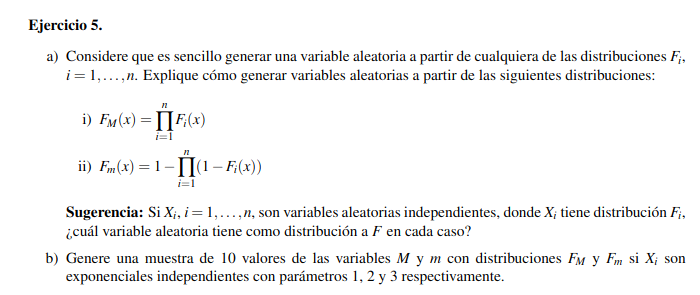

Para el caso i) si las variables Xi son independientes, entonces la distribucion de M es la distribucion acomulada conjunta de $X_1, X_2, ..., X_n$. Para poder generarla voy a tener que generar n valores de una distribucion uniforme y luego aplicar la funcion inversa de la distribucion acumulada de cada $F_i$ y tomar el producto de eso como el valor generado de M.

In [331]:
def gen_exponencial (lamda):
    u = 1-rd.random()
    return -np.log(1-u)/lamda

In [332]:
def generar_M(fi):
    u = rd.random()
    acum = 1
    for i in range(len(fi)):
        acum *= fi[i]['gen'](*fi[i]['params'])
    return acum

In [320]:
# defino el fi para este caso
# son 3 variables exponenciales con parametros 1 ,2 y 3.
fi ={
    0: {
        'gen': gen_exponencial, 
        'params': [1]
    },
    1: {
        'gen': gen_exponencial, 
        'params': [2]
    },
    2: {
        'gen': gen_exponencial, 
        'params': [3]
    }
}

In [459]:
# genero 10 valores de M
for _ in range(10):
    x = generar_M(fi)
    print(x) 

0.028126656107949916
0.05880887919652654
0.0011424418352110992
0.02089219895246125
0.60831030783614
0.016299886512057778
2.6830354496132522
0.0010621660361984475
0.0022841666533359836
0.04969815788028632


Como en el caso i) M es la distribucion conjunta de $X_1, X_2, ..., X_n$ entonces la esperanza de M es el producto de las esperanzas de las variables Xi.

In [429]:
# esperanza de las variables exponenciales
esperanza = 1 * 0.5 * 1/3
print("Esperanza teorica del caso i): ", esperanza)

Esperanza teorica del caso i):  0.16666666666666666


In [431]:
# estimo la esperanza con el metodo para generar M
nsims = 10000
M = [generar_M(fi) for i in range(nsims)]
esperanza_estimada = sum(M)/nsims
print("Esperanza estimada del caso i): ", esperanza_estimada)

Esperanza estimada del caso i):  0.1633650267738326


#### ii 
donde m es la distribucion del minimo de un conjunto de variables aleatorias independientes e identicamente distribuidas. Entonces para poder generarla vamos a tener que generar n valores de una distribucion uniforme y luego generar un valor para cada $F_i$, y calcular 1 - dicho valor. 

Luego tomar el producto de todos esos valores y restarselo a 1. Ese sera el valor de m.

In [324]:
def generar_m(fi):
    acum = 1
    for i in range(len(fi)):
        acum *= 1 - fi[i]['gen'](*fi[i]['params'])
    return 1 - acum

In [439]:
# genero 10 valores de m
for _ in range(10):
    print(generar_m(fi))

0.522739291153298
0.9082760122194263
0.4076840187781916
0.6467827424418933
0.7591447694686766
1.0866272563885788
0.48449555008312817
1.0188623259099534
1.0033573007149463
0.9593402164042181


In [450]:
# estimo esperanza usando el generador de m
nsims = 1000
M = [generar_m(fi) for i in range(nsims)]
esperanza_estimada = sum(M)/nsims
print("Esperanza estimada del caso ii): ", esperanza_estimada)

Esperanza estimada del caso ii):  0.9907820069321239
